# Pruebas GradientBoost

El set de training usado se genera desde `lucho/generar_set_test`


In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [4]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [5]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [6]:
TEST_SIZE_PERCENT = 0.1
RANDOM_SEED = 12

In [7]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [8]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [12]:
clasificador = GradientBoostingClassifier(
    max_features='sqrt', 
    min_samples_split=100, 
    random_state=RANDOM_SEED, 
    verbose=10
)

In [13]:
clasificador.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2619            1.39m
         2           1.2098            1.35m
         3           1.1412            1.28m
         4           1.0316            1.29m
         5           0.9985            1.30m
         6           0.9143            1.28m
         7           0.8692            1.28m
         8           0.7955            1.26m
         9           0.7364            1.25m
        10           0.7127            1.25m
        11           0.6621            1.24m
        12           0.6455            1.23m
        13           0.6069            1.22m
        14           0.5747            1.22m
        15           0.5629            1.21m
        16           0.5283            1.21m
        17           0.5023            1.20m
        18           0.4844            1.20m
        19           0.4717            1.19m
        20           0.4628            1.19m
        21           0.4456            1.18m
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=12, subsample=1.0, verbose=10,
              warm_start=False)

In [14]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

In [15]:
roc_auc_score(y_test, y_test_predictd)

0.9895349675996439

In [16]:
clasificador.score(X_test, y_test)

0.96441

In [17]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [18]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

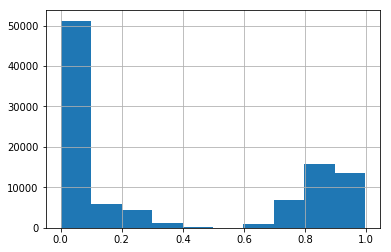

In [19]:
kaggle_out['sepostulo'].hist()

In [28]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-39.csv', index=False)

In [20]:
kaggle_37 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-37.csv')
kaggle_38 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-38.csv')

In [22]:
print('roc auc 38 vs 37:', roc_auc_score(np.round(kaggle_37['sepostulo']), kaggle_38['sepostulo']))
print('roc auc 39 vs 37:', roc_auc_score(np.round(kaggle_37['sepostulo']), kaggle_out['sepostulo']))
print('roc auc 39 vs 38:', roc_auc_score(np.round(kaggle_38['sepostulo']), kaggle_out['sepostulo']))

roc auc 38 vs 37: 0.9957863005835678
roc auc 39 vs 37: 0.9958944519985307
roc auc 39 vs 38: 0.9980707607092361


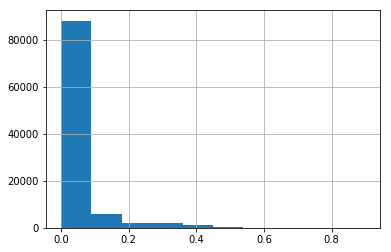

In [25]:
np.abs(kaggle_37['sepostulo'] - kaggle_38['sepostulo']).hist()

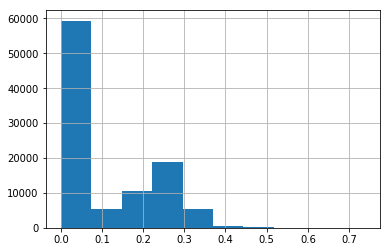

In [26]:
np.abs(kaggle_37['sepostulo'] - kaggle_out['sepostulo']).hist()

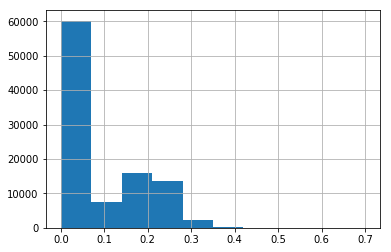

In [27]:
np.abs(kaggle_38['sepostulo'] - kaggle_out['sepostulo']).hist()

In [29]:
# Score kaggle: 0.88467